<a href="https://colab.research.google.com/github/ankithanatgit/pythontask1/blob/main/restaurant_sales_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving restaurant_sales_jun_oct_2025.csv to restaurant_sales_jun_oct_2025 (22).csv
      Order_ID        Date     Branch          Item  Category  Quantity  \
0  ORD20250681  28-08-2025   Mallside  Paneer Tikka      Food         2   
1  ORD20250685  11-08-2025   Lakeside    Cheesecake   Dessert         2   
2  ORD20250634  23-09-2025    Hilltop    Sushi Roll      Food         5   
3  ORD20250682  02-10-2025   Downtown         Latte  Beverage         4   
4  ORD20250694  27-09-2025  Riverside   Mango Lassi  Beverage         4   

   Unit_Price  Total_Sales  GST_Percent  GST_Amount  Total_With_Tax  \
0         360          720            0         0.0           720.0   
1         279          558            5        27.9           585.9   
2         322         1610            5        80.5          1690.5   
3          77          308            0         0.0           308.0   
4         150          600           12        72.0           672.0   

  Payment_Method Customer_Type  
0     

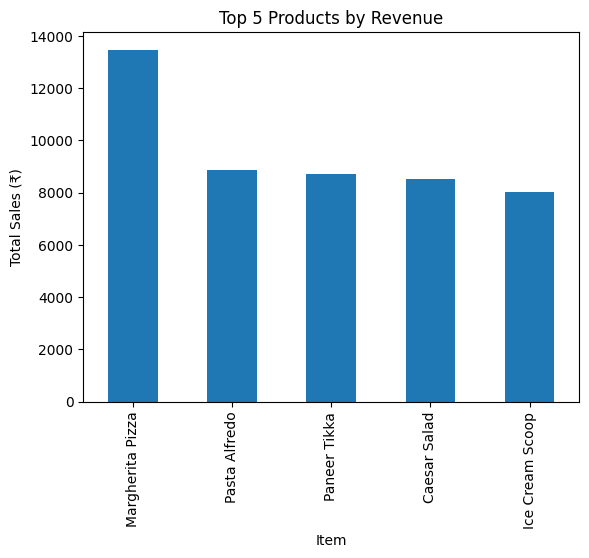

In [7]:
from google.colab import files
uploaded = files.upload()
import matplotlib.pyplot as plt
import pandas as pd
df=pd.read_csv("restaurant_sales_jun_oct_2025.csv")
print(df.head())
total_sales=df["Total_With_Tax"].sum()
print(f"Total Sales (including tax): ₹{total_sales:}")
# By total revenue
best_by_revenue = df.groupby("Item")["Total_With_Tax"].sum().sort_values(ascending=False).head(1)
print(f"Best selling item by total revenue:{best_by_revenue}")

# By quantity sold
best_by_quantity = df.groupby("Item")["Quantity"].sum().sort_values(ascending=False).head(1)
print(f"best selling product by quantity:{best_by_quantity}")

#basic sales report
report = {
    "Total Orders": len(df),
    "Total Sales (₹)": round(total_sales, 2),
    "Unique Products": df["Item"].nunique(),
    "Top Product (Revenue)": best_by_revenue.index[0],
    "Revenue from Top Product (₹)": float(best_by_revenue.values[0]),
    "Top Product (Quantity)": best_by_quantity.index[0],
    "Quantity Sold of Top Product": int(best_by_quantity.values[0]),
    "Top Branch (by Revenue)": df.groupby("Branch")["Total_With_Tax"].sum().idxmax(),
    "Most Used Payment Method": df["Payment_Method"].mode()[0]
}

# Display the report
print("\n📋 Basic Sales Report:")
for k, v in report.items():
    print(f"{k}: {v}")


# Top 5 products by revenue
top_products = df.groupby("Item")["Total_With_Tax"].sum().sort_values(ascending=False).head(5)
top_products.plot(kind="bar", title="Top 5 Products by Revenue", ylabel="Total Sales (₹)")
plt.show()


